### How to take labeled AnnData object and Calculate Gene Ditributions

In [87]:
import squidpy as sq
from hest import iter_hest
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np

#### Get AnnData from SpatialliBD
* Using MISC1 for now sample 151676

In [88]:
id  = 'MISC1'
sample = ad.read_h5ad(f"methods/{id}.h5")
sample.obs.columns

Index(['in_tissue', 'array_row', 'array_col', 'pxl_col_in_fullres',
       'pxl_row_in_fullres', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', '151676_deepst.csv',
       '151676_deepst_5_clusters.csv', '151676_deepst_8_clusters.csv',
       '151676_MISC1spagcn_2_clusters.csv', '151676_deepst_6_clusters.csv',
       '151676_deepst_9_clusters.csv', '151676_deepst_7_clusters.csv',
       '151676_deepst_2_clusters.csv', '151676_MISC1spagcn_3_clusters.csv',
       '151676_MISC1spagcn_5_clusters.csv', '151676_deepst_4_clusters.csv',
       '151676_MISC1spagcn_4_clusters.csv', '151676_MISC1spagcn.csv',
       '151676_deepst_3_clusters.csv'],
      dtype='object')

### Use Moran's I to calculate Spatially Variable Genes

/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/scanpy/metrics/_common.py:72: UserWarning: 12226 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

(array([1.9256e+04, 1.4340e+03, 3.8100e+02, 1.5800e+02, 4.6000e+01,
        2.0000e+01, 4.0000e+00, 4.0000e+00, 8.0000e+00, 1.0000e+00]),
 array([-0.0290145 ,  0.06554351,  0.16010153,  0.25465954,  0.34921756,
         0.44377558,  0.53833359,  0.63289161,  0.72744963,  0.82200764,
         0.91656566]),
 <BarContainer object of 10 artists>)

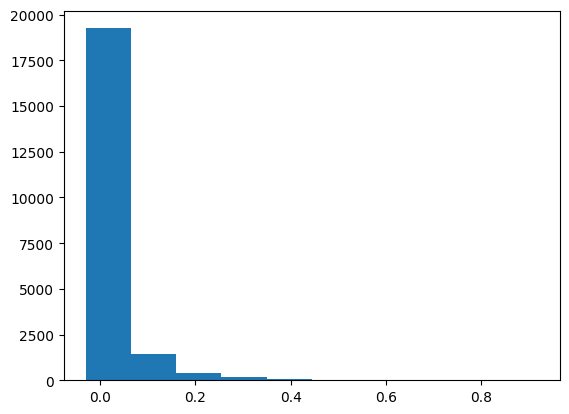

In [89]:
from sdi_variation.downstream import Morans_I
Morans_I(sample)
plt.hist(sample.uns["moranI"]['I'].dropna())

np.int64(154)

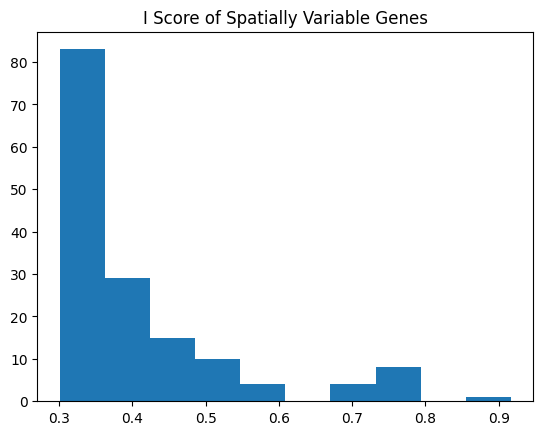

In [106]:
i_score = sample.uns['moranI']
t = 0.3 # spatial clustering threshold
genes_of_interest = i_score['I'] > t

plt.hist(i_score.loc[genes_of_interest,'I'])
plt.title("I Score of Spatially Variable Genes")
genes_of_interest.sum()

### Use deepst 7 clusters

Text(0, 0.5, 'Clusters')

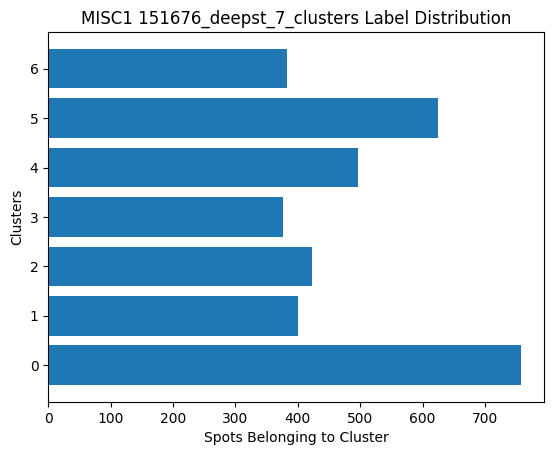

In [91]:
dst_7 = '151676_deepst_7_clusters.csv'
cluster_counts = sample.obs[dst_7].value_counts()
plt.barh(cluster_counts.index,cluster_counts)
plt.title(f"{id} {dst_7.split('.')[0]} Label Distribution")
plt.xlabel("Spots Belonging to Cluster")
plt.ylabel("Clusters")

### Plot Gene Counts

In [101]:
def plot_gene_dist(count_vector:np.ndarray,n_genes:int):
    plt.bar(list(range(count_vector.shape[0])),np.log(count_vector + 1))
    plt.xlabel("Gene ID")
    plt.ylabel(f"log(gene counts + 1)")
    plt.xlim((0,n_genes))

In [113]:
c = 5 # Cluster to visualize

Text(0.5, 1.0, 'Cluster 3 Gene Count Distribution')

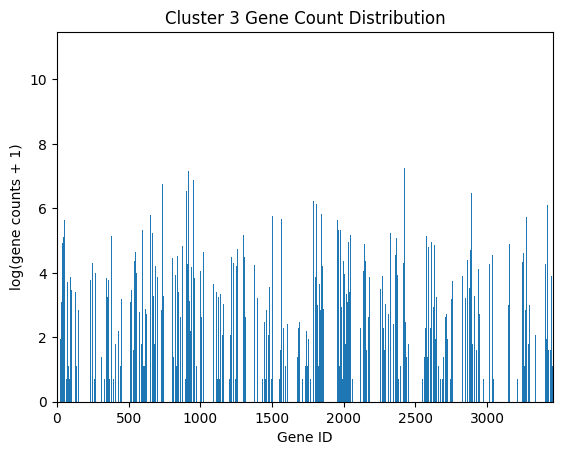

In [ ]:
clust = sample.obs[dst_7] == c
gene_counts = sample.X.toarray()


clust_genes = sample.X.toarray()[clust,:][:,genes_of_interest].sum(axis = 0)
plot_gene_dist(clust_genes,gene_counts.shape[0])
plt.title(f"Cluster {c} Gene Count Distribution")



Text(0.5, 1.0, 'Cluster 5 Variable Gene Count Distribution')

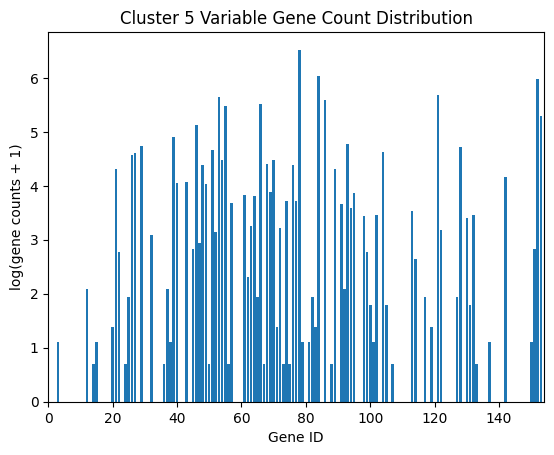

In [114]:
clust_var_genes = sample.X.toarray()[clust,:][:,genes_of_interest].sum(axis = 0)

plot_gene_dist(clust_var_genes,genes_of_interest.sum())
plt.title(f"Cluster {c} Variable Gene Count Distribution")
